In [1]:
# задача про кораблики
from deap import base, algorithms
from deap import creator
from deap import tools

import algelitism
from graph_show import show_graph, show_ships

import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
POLE_SIZE = 7
SHIPS = 4
LENGTH_CHROM = 3*SHIPS    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 200   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.2        # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений
HALL_OF_FAME_SIZE = 1

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

gen	nevals	min	avg  
0  	200   	0  	1.833
1  	173   	0  	1.013
2  	182   	0  	0.887
3  	167   	0  	0.734
4  	188   	0  	0.939
5  	185   	0  	0.79 
6  	178   	0  	0.659
7  	179   	0  	0.81 
8  	185   	0  	0.778
9  	186   	0  	0.838
10 	179   	0  	0.794
11 	188   	0  	0.755
12 	179   	0  	0.666
13 	186   	0  	0.39 
14 	179   	0  	0.645
15 	170   	0  	0.467
16 	184   	0  	0.506
17 	179   	0  	0.647
18 	188   	0  	0.673
19 	179   	0  	0.465
20 	165   	0  	0.476
21 	182   	0  	0.451
22 	178   	0  	0.633
23 	177   	0  	0.47 
24 	181   	0  	0.564
25 	188   	0  	0.304
26 	186   	0  	0.447
27 	188   	0  	0.358
28 	184   	0  	0.384
29 	189   	0  	0.393
30 	185   	0  	0.347
31 	178   	0  	0.273
32 	181   	0  	0.268
33 	179   	0  	0.36 
34 	185   	0  	0.297
35 	181   	0  	0.184
36 	194   	0  	0.218
37 	186   	0  	0.258
38 	178   	0  	0.212
39 	179   	0  	0.173
40 	172   	0  	0.197
41 	181   	0  	0.26 
42 	174   	0  	0.188
43 	188   	0  	0.228
44 	186   	0  	0.264
45 	189   	0  	0.2  
46 	186   	0 

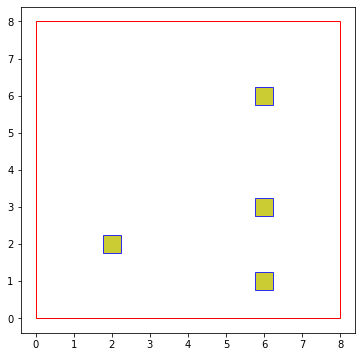

In [3]:
def randomShip(total):
    ships = []
    for n in range(total):
        ships.extend([random.randint(1, POLE_SIZE), random.randint(1, POLE_SIZE), random.randint(0, 1)])

    return creator.Individual(ships)


toolbox = base.Toolbox()
toolbox.register("randomShip", randomShip, SHIPS)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.randomShip)

population = toolbox.populationCreator(n=POPULATION_SIZE)

def shipsFitness(individual):
    type_ship = [1, 1, 1, 1]

    inf = 1000
    P0 = np.zeros((POLE_SIZE, POLE_SIZE))
    P = np.ones((POLE_SIZE+6, POLE_SIZE+6))*inf
    P[1:POLE_SIZE+1, 1:POLE_SIZE+1] = P0

    th = 0.2
    h = np.ones((3, 6)) * th
    ship_one = np.ones((1, 4))
    v = np.ones((6, 3)) * th

    for *ship, t in zip(*[iter(individual)] * 3, type_ship):
        if ship[-1] == 0:
            sh = np.copy(h[:, :t+2])
            sh[1, 1:t+1] = ship_one[0, :t]
            P[ship[0] - 1:ship[0] + 2, ship[1]-1:ship[1] + t+1] += sh
        else:
            sh = np.copy(v[:t+2, :])
            sh[1:t+1, 1] = ship_one[0, :t]
            P[ship[0]-1:ship[0] + t+1, ship[1] - 1:ship[1] + 2] += sh


    s = np.sum(P[np.bitwise_and(P > 1, P < inf)])
    s += np.sum(P[P > inf+th*4])

    return s,         # кортеж

def mutShips(individual, indpb):
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] = random.randint(0, 1) if (i+1) % 3 == 0 else random.randint(1, POLE_SIZE)

    return individual,


toolbox.register("evaluate", shipsFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", mutShips, indpb=1.0/LENGTH_CHROM)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)


def show(ax):
    ax.clear()
    show_ships(ax, hof.items[0], POLE_SIZE)

    plt.draw()
    plt.gcf().canvas.flush_events()


plt.ion()
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

ax.set_xlim(-2, POLE_SIZE+3)
ax.set_ylim(-2, POLE_SIZE+3)

population, logbook = algelitism.eaSimpleElitism(population, toolbox,
                                                 cxpb=P_CROSSOVER,
                                                 mutpb=P_MUTATION,
                                                 ngen=MAX_GENERATIONS,
                                                 halloffame=hof,
                                                 stats=stats,
                                                 callback=(show, (ax, )),
                                                 verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.ioff()
plt.show()

# plt.plot(maxFitnessValues, color='red')
# plt.plot(meanFitnessValues, color='green')
# plt.xlabel('Поколение')
# plt.ylabel('Макс/средняя приспособленность')
# plt.title('Зависимость максимальной и средней приспособленности от поколения')
# plt.show()
#